# Exercise - The YouTube Dataset: Preprocessing - Solution

### Introducing the assignment

You can complete this exercise only after you have studied the following lessons:
* **The YouTube Dataset: Classification**
* **The YouTube Dataset: Confusion matrix** and
* **The YouTube Dataset: Accuracy, Precision, Recall, and the F1 score**

In this exercise, you will explore the consequences of transforming the dataset **before** train-test splitting by looking into the confusion matrix and classification report and comparing them with the results from the lessons. 

The code under the following sections is implemented: 
* **Importing the necessary libraries** - import all libraries necessary for completing the exercise.
* **Reading the database** - concatenate the datasets from all 5 ".csv" files into one dataframe and removing the unnecessary columns.
* **Defining the inputs and the target** - define the inputs as all comments from the database. The targets are their respective classes.
* **Tokenizing the YouTube comments** - create a vocabulary dictionary containing the words from all comments in the database.
* **Creating the train-test split** - perform the train-tests split.

Don't forget to put this notebook in the parent folder of the **youtube-dataset** folder. Otherwise, you would need to change the path under **Reading the database**.

Please implement the relevant code from these lessons under the following sections:
* **Performing the classification** - define a classifier and fit the model to the training data.
* **Performing the evaluation on the test dataset** - make predictions on the test data. Using those predictions, construct a confusion matrix and a classification report.

Please answer the following questions when you are ready:
* What changes do you observe in the confusion matrix?
* How do these changes affect the classification report?
* How do you interpret the results?

Good luck and have fun!

### Introducing the database

The database for this example is taken from https://archive.ics.uci.edu/ml/machine-learning-databases/00380/ 

We usually modify the databases slightly such that they fit the purpose of the course. Therefore, we suggest you use the database provided in the resources in order to obtain the same results as the ones in the lectures.

### Importing the necessary libraries

In [1]:
import pandas as pd
import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np

### Reading the database

In [2]:
files = glob.glob('youtube-dataset\\*.csv')
files

['youtube-dataset\\Youtube01.csv',
 'youtube-dataset\\Youtube02.csv',
 'youtube-dataset\\Youtube03.csv',
 'youtube-dataset\\Youtube04.csv',
 'youtube-dataset\\Youtube05.csv']

In [3]:
all_df = []

for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1))

In [4]:
data = pd.concat(all_df, axis=0, ignore_index=True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


### Defining the inputs and the target

In [5]:
inputs = data['CONTENT']
target = data['CLASS']

### Tokenizing the YouTube comments

In [6]:
vectorizer = CountVectorizer()

In [7]:
inputs_transf = vectorizer.fit_transform(inputs)

### Creating the train-test split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs_transf, target, 
                                                    test_size=0.2, 
                                                    random_state=365, 
                                                    stratify = target)

### Performing the classification

In [9]:
clf = MultinomialNB()

clf.fit(x_train, y_train)

MultinomialNB()

### Performing the evaluation on the test dataset

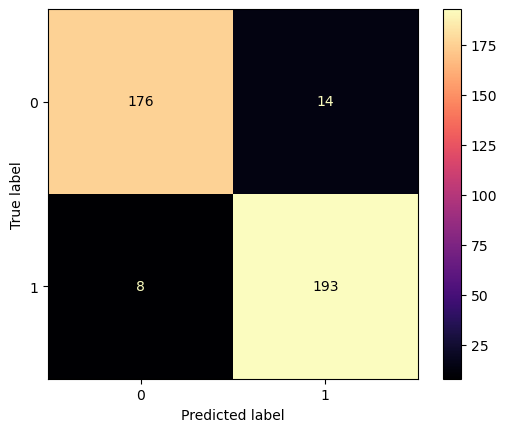

In [10]:
y_test_pred = clf.predict(x_test)

sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [11]:
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.96      0.93      0.94       190
        Spam       0.93      0.96      0.95       201

    accuracy                           0.94       391
   macro avg       0.94      0.94      0.94       391
weighted avg       0.94      0.94      0.94       391

